<a href="https://colab.research.google.com/github/ShubhamSaini01/Kaggle/blob/main/DogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #mounting drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf #libraries
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##Downloading Data

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "gaurangpendharkar" # username from the json file
os.environ['KAGGLE_KEY'] = "da6c2facfd02e351199bfc52b9a22f32" # key from the json file

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.12

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
  Using cached kaggle-1.5.12-py3-none-any.whl


In [ ]:
!kaggle competitions download -c dogs-vs-cats -p /content/gdrive/MyDrive/Kaggle/Zip

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/gdrive/MyDrive/Kaggle/Zip/dogs-vs-cats.zip -d /content/gdrive/MyDrive/Kaggle/Dog_Cat

Archive:  /content/gdrive/MyDrive/Kaggle/Zip/dogs-vs-cats.zip
replace /content/gdrive/MyDrive/Kaggle/Dog_Cat/sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/gdrive/MyDrive/Kaggle/Dog_Cat/sampleSubmission.csv  
  inflating: /content/gdrive/MyDrive/Kaggle/Dog_Cat/test1.zip  
  inflating: /content/gdrive/MyDrive/Kaggle/Dog_Cat/train.zip  


In [ ]:
!unzip /content/gdrive/MyDrive/Kaggle/Dog_Cat/train.zip -d /content/gdrive/MyDrive/Kaggle/Dog_Cat
#!unzip /content/gdrive/MyDrive/Kaggle/Dog_Cat/test1.zip -d /content/gdrive/MyDrive/Kaggle/Dog_Cat

In [ ]:
import shutil
for x in range(0,12500): #Moving files into a Cat folder
  file = "/content/gdrive/MyDrive/Kaggle/Dog_Cat/train/cat."+str(x)+".jpg"
  shutil.move(file, "/content/gdrive/MyDrive/Kaggle/Dog_Cat/train/Cat")


In [5]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import shutil
shutil.move(/content/gdrive/MyDrive/Kaggle/Dog_Cat/Split, )

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders #Splits the training set into training and validation
splitfolders.ratio("/content/gdrive/MyDrive/Kaggle/Dog_Cat/train", output="/content/gdrive/MyDrive/Kaggle/Dog_Cat/Split", seed=1338, ratio=(.8, .2), group_prefix=None)

In [ ]:
!unzip /content/train-20211101T221119Z-001.zip
!unzip /content/val-20211101T180750Z-001.zip

##Preprocessing

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255, #applying transformations
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )
training_set = train_datagen.flow_from_directory('/content/train', #training set
                                                 target_size = (200, 200),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 )
validation_datagen = ImageDataGenerator(rescale = 1./255, #creating a separate datagen for validation to prevent image augmentation
                                   )
validation_set = validation_datagen.flow_from_directory('/content/val', #validation set
                                                 target_size = (200, 200),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

##Training Model

In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding = 'same', input_shape=[200, 200, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding = 'same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding = 'same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 25)

Epoch 1/25
313/313 [==============================] - 384s 1s/step - loss: 0.6968 - accuracy: 0.5628 - val_loss: 0.6169 - val_accuracy: 0.6840
Epoch 2/25
313/313 [==============================] - 363s 1s/step - loss: 0.6033 - accuracy: 0.6776 - val_loss: 0.5427 - val_accuracy: 0.7364
Epoch 3/25
313/313 [==============================] - 346s 1s/step - loss: 0.5459 - accuracy: 0.7229 - val_loss: 0.4732 - val_accuracy: 0.7662
Epoch 4/25
313/313 [==============================] - 340s 1s/step - loss: 0.5023 - accuracy: 0.7539 - val_loss: 0.4629 - val_accuracy: 0.7772
Epoch 5/25
313/313 [==============================] - 338s 1s/step - loss: 0.4640 - accuracy: 0.7823 - val_loss: 0.4685 - val_accuracy: 0.7790
Epoch 6/25
313/313 [==============================] - 335s 1s/step - loss: 0.4392 - accuracy: 0.7982 - val_loss: 0.4195 - val_accuracy: 0.8176
Epoch 7/25
313/313 [==============================] - 336s 1s/step - loss: 0.4181 - accuracy: 0.8094 - val_loss: 0.3827 - val_accuracy: 0.8300

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


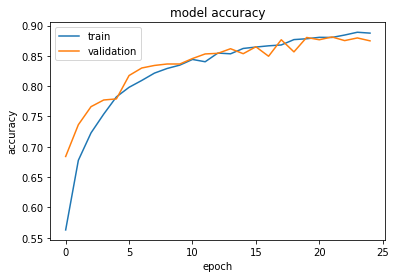

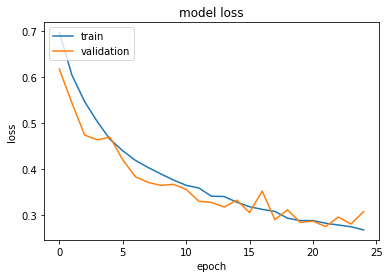

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##Evaluation of individual images

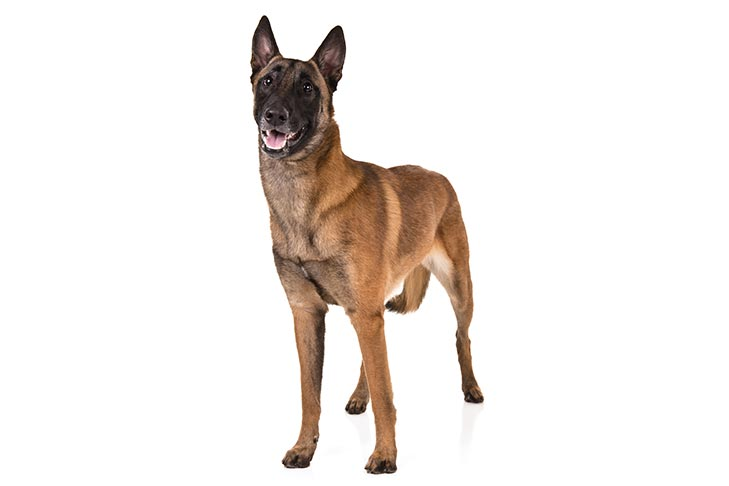

In [25]:
import cv2
image_path = '/content/Dog_or_Cat_1.jpg'
from IPython.display import Image
Image(image_path)

In [22]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(image_path, target_size = (200,200)) #We are importing the test image and converting it inton 64x64
test_image = image.img_to_array(test_image) #Converting image into array
test_image = np.expand_dims(test_image, axis = 0) #Adding an extra dimension to the image otherwise the CNN won't accept it, this dimension will be the first dimension
result = cnn.predict(test_image) #Predicting
print(training_set.class_indices) #Tells us that cat=0 and dog=1
if result[0][0] == 1: #The two 0s next to result indicate that we are choosing the first result from the batch of 32 and we are picking the first prediction
  prediction = 'dog'
else:
  prediction = 'cat'

print("The image appears to be a " + prediction)

{'Cat': 0, 'Dog': 1}
The image appears to be a dog
